In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

In [21]:
df_DS_US=df[(df['job_title_short']== "Data Scientist")& (df['job_country']== "United States")].copy()

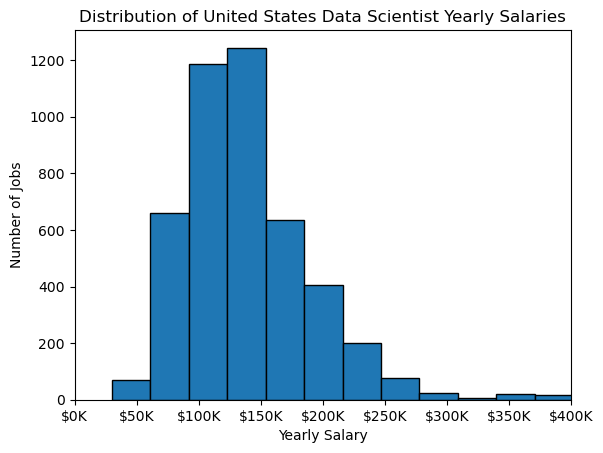

In [59]:
df_DS_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0,400000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title("Distribution of United States Data Scientist Yearly Salaries")
plt.ylabel("Number of Jobs")
plt.xlabel("Yearly Salary")
plt.show()